# Crime Data 

Suburb-based crime statistics for crimes against the person and crimes against property. The Crime statistics datasets contain all offences against the person and property that were reported to police in that respective financial year.



`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
if os.path.isfile("2019-20-fullyr-data-sa-crime.csv"):
    filepath = "2019-20-fullyr-data-sa-crime.csv"
    print("loading from file")
else:
    filepath = "https://data.sa.gov.au/data/dataset/860126f7-eeb5-4fbc-be44-069aa0467d11/resource/590083cd-be2f-4a6c-871e-0ec4c717717b/download/2019-20-fullyr-data_sa_crime.csv"
    print("loading from the internet")

crime_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


# Top 10 Crimest Suburbs in SA

<AxesSubplot:>

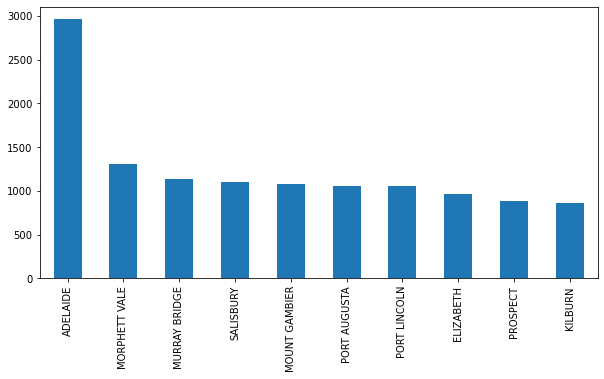

In [45]:
crime_data["Suburb - Incident"].value_counts()[:10].plot.bar()

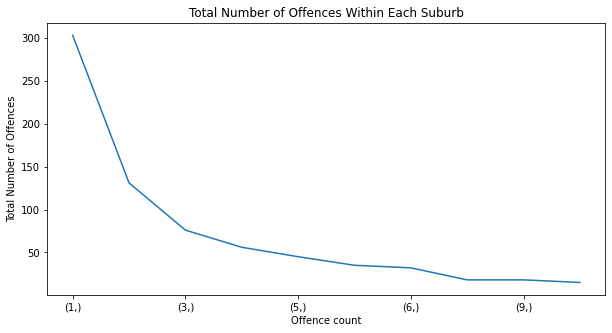

In [47]:
grouped = crime_data.groupby("Suburb - Incident").sum()
grouped.value_counts()[:10].plot()
plt.title("Total Number of Offences Within Each Suburb")
plt.ylabel("Total Number of Offences")
plt.show()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

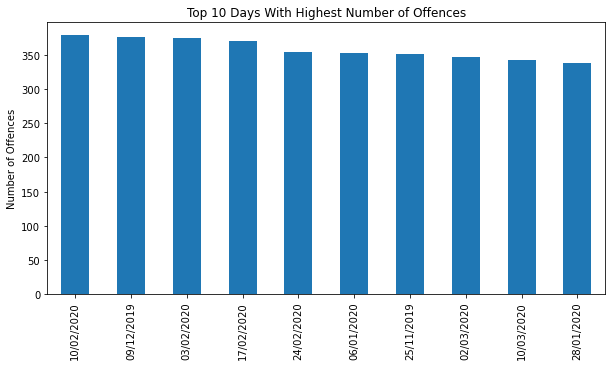

In [37]:
crime_data["Reported Date"].value_counts()[:10].plot.bar()
plt.title("Top 10 Days With Highest Number of Offences")
plt.ylabel("Number of Offences")
plt.show()

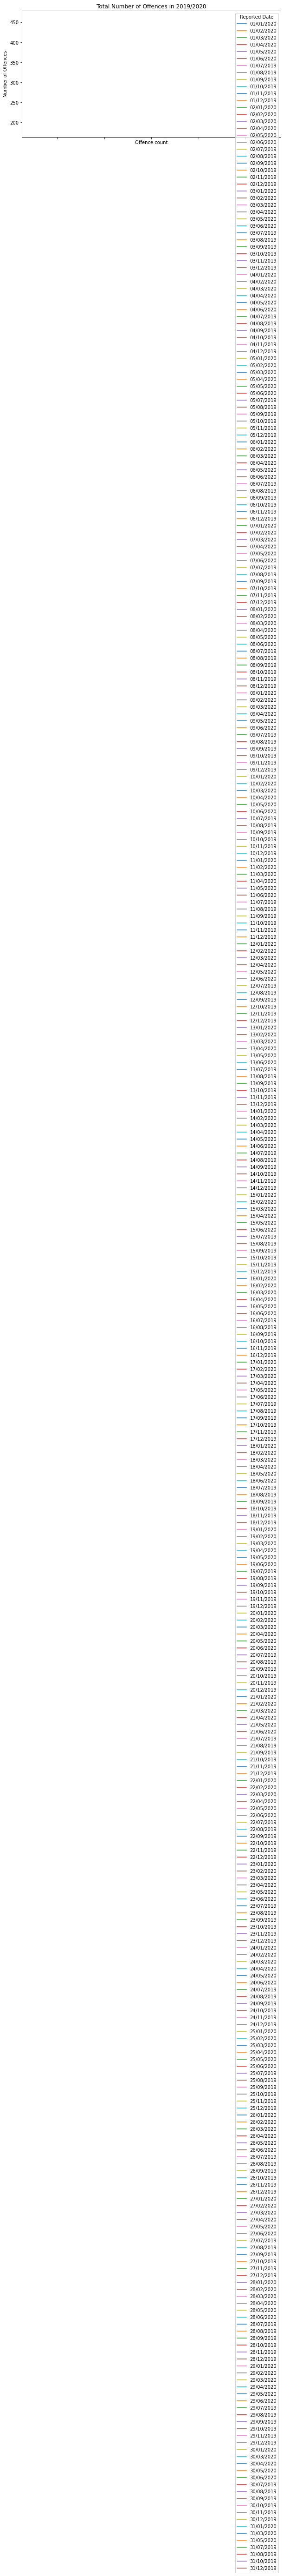

In [43]:
grouped = crime_data.groupby("Reported Date").sum()
bad_rows = [x for x in list(grouped.index) if (len(x) > 70 or "(" in x)]
grouped.drop(bad_rows).transpose().plot()
plt.title("Total Number of Offences in 2019/2020")
plt.ylabel("Number of Offences")
plt.show()

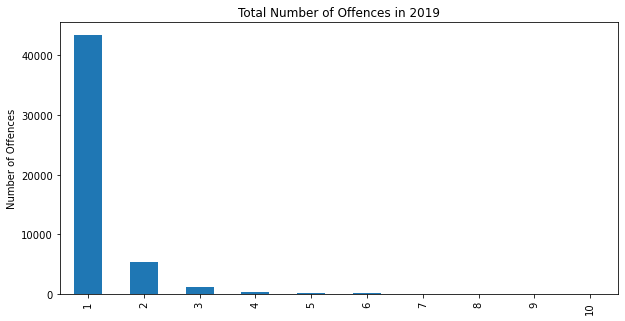

In [40]:
crime_data["Offence count"].iloc[2:50797].value_counts()[:10].plot.bar()
plt.title("Total Number of Offences in 2019")
plt.ylabel("Number of Offences")
plt.show()

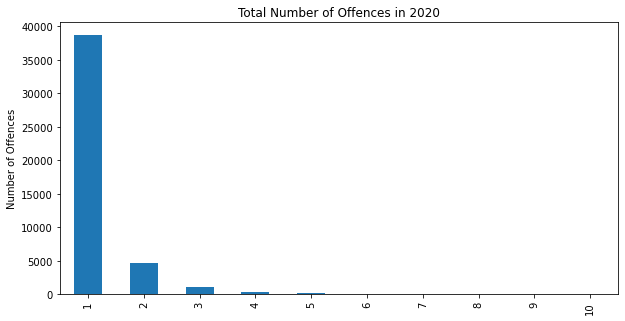

In [41]:
crime_data["Offence count"].iloc[50797:95701].value_counts()[:10].plot.bar()
plt.title("Total Number of Offences in 2020")
plt.ylabel("Number of Offences")
plt.show()

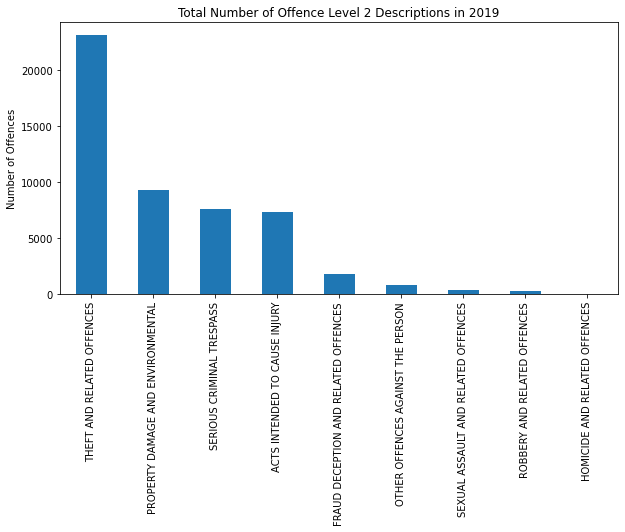

In [53]:
crime_data["Offence Level 2 Description"].iloc[2:50797].value_counts()[:10].plot.bar()
plt.title("Total Number of Offence Level 2 Descriptions in 2019")
plt.ylabel("Number of Offences")
plt.show()

<AxesSubplot:>

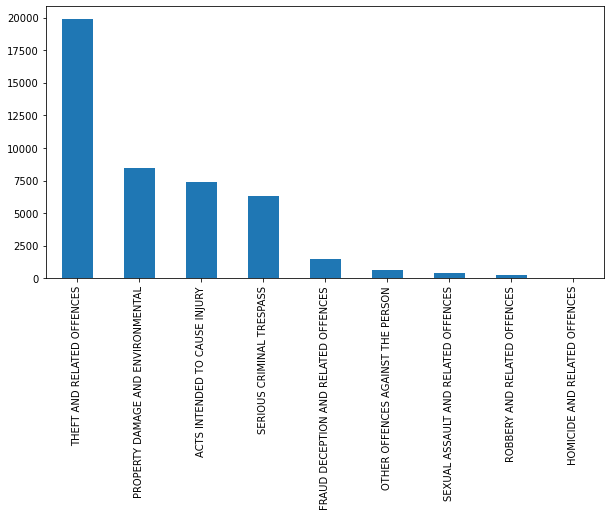

In [54]:
crime_data["Offence Level 2 Description"].iloc[50797:95701].value_counts()[:10].plot.bar()
plt.title("Total Number of Offence Level 2 Descriptions in 2020")
plt.ylabel("Number of Offences")
plt.show()

<AxesSubplot:>

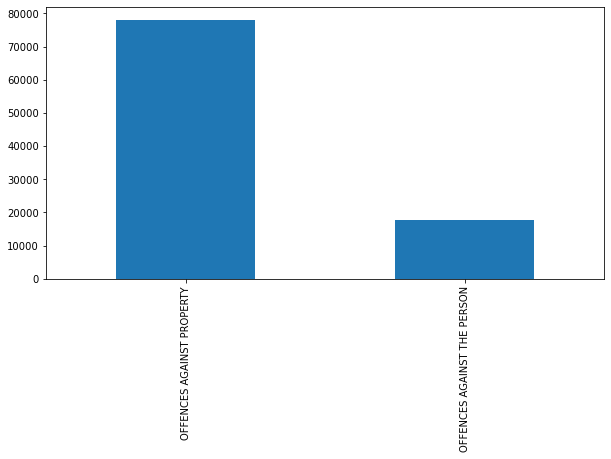

In [17]:
crime_data["Offence Level 1 Description"].value_counts().plot(kind="bar")

<AxesSubplot:>

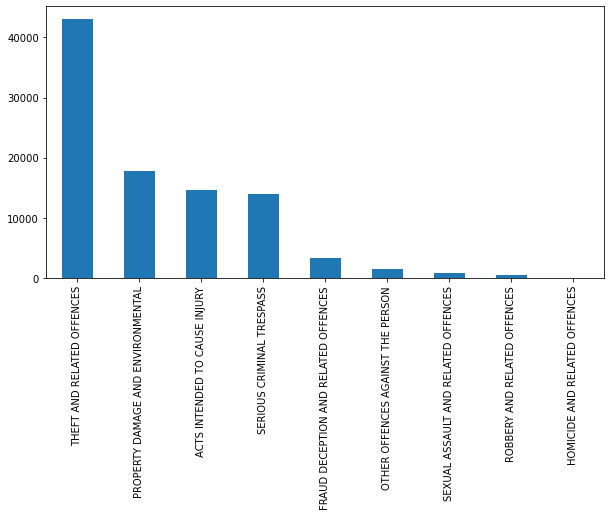

In [18]:
crime_data["Offence Level 2 Description"].value_counts().plot(kind="bar")

<AxesSubplot:>

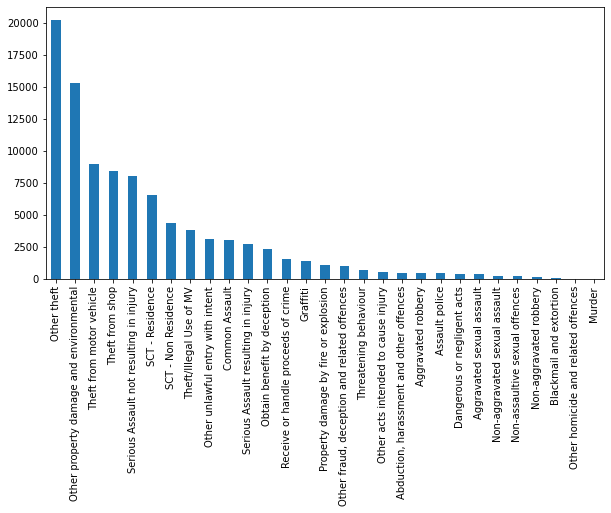

In [49]:
crime_data["Offence Level 3 Description"].value_counts().plot(kind="bar")